## Notebook to run the response amplitude (A) trends analysis, Section 5.1 Figure 10 

In [1]:
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.units import Unit as u
import matplotlib.pyplot as plt
import numpy as np

In [4]:
t_beta=Table.read('temp_ev_analysis_beta_exp_trends/gamma_radio_delay_fit_vs_beta_exp.ecsv')
t_beta_nsc=Table.read('temp_ev_analysis_beta_exp_trends_no_synch_cooling/gamma_radio_delay_fit_vs_beta_exp.ecsv')
#t_beta_nc=Table.read('temp_ev_analysis_beta_exp_trends_no_cooling/gamma_radio_delay_fit_vs_beta_exp.ecsv')

In [3]:
t_beta_nsc

beta_exp,delta_T,delta_T_conv,delta_T_conv_err,t_decay,t_decay_conv,t_decay_conv_err,t_rise_conv,t_rise_conv_err,t_peak_radio,t_peak_gamma,A,A_err
1 / c,d,d,d,d,d,d,d,d,d,d,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.001,137.38425925925927,127.76652155958851,0.8928647847410252,242.08576507650423,242.08576507650423,3.2465290907585045,81.06761023148485,4.176691720028773,137.47685185185185,0.09259259259259259,1.745998743339498e-26,1.149616576827229e-28
0.0018846716378431187,73.04398148148148,68.33801570637537,0.47211153294820474,128.46424852829995,128.46424852829995,1.7186816752006686,43.0316289649343,2.2158029347032597,73.13657407407408,0.09259259259259259,1.5251101729110517e-26,9.991285772767924e-29
0.003551987182490267,38.90046296296296,36.5729353524065,0.2514041785444733,68.17528360981828,68.17528360981828,0.9141771824573081,22.844518326858147,1.1768464059016188,38.99305555555556,0.09259259259259259,1.307942151975979e-26,8.611725699595629e-29
0.006694329500821696,20.787037037037038,19.676560455142216,0.13350480135515494,36.182668231819925,36.182668231819925,0.48532557857053193,12.13408041407728,0.6249858268469182,20.87962962962963,0.09259259259259259,1.0049006544784509e-26,6.620128811347643e-29
0.01261661294457514,11.180555555555554,10.634676504279252,0.07088869067186093,19.205214176118268,19.205214176118268,0.2576048823227436,6.445947279926747,0.3319462692518647,11.273148148148147,0.09259259259259259,7.02933629039542e-27,4.632066379740523e-29
0.023778172582285134,6.076388888888888,5.783170706884789,0.051438964508872524,10.192374786595018,10.192374786595018,0.160990083647642,3.4214683366539123,0.18044254754197078,6.168981481481481,0.09259259259259259,8.389743824710543e-27,7.55889956082528e-29
0.04481404746557166,3.3680555555555554,3.183548695021667,0.03743178043096961,5.407594295732126,5.407594295732126,0.1056622558862167,1.8113653710260824,0.09973889465390365,3.460648148148148,0.09259259259259259,9.387808761341062e-27,1.1607905222853862e-28
0.08445976423531824,1.9328703703703702,1.7921374352317034,0.02728737326412311,2.865168557540115,2.865168557540115,0.07236486539336047,0.9513476692388954,0.05665528353025497,2.025462962962963,0.09259259259259259,1.0024470642991617e-26,1.7091699866481186e-28


In [22]:
t_nu=Table.read('temp_ev_analysis_nu_trends/gamma_radio_delay_fit_vs_freq.ecsv')
t_nu_nsc=Table.read('temp_ev_analysis_nu_trends_no_synch_cooling/gamma_radio_delay_fit_vs_freq.ecsv')



In [23]:
def beta_exp_plot(t_c,t_nc):
    fig=plt.figure(dpi=150,figsize=(6,4.5))
    ax=fig.add_subplot()
    m=t_c['beta_exp']>1E-3
    x=t_c['beta_exp'][m]
    y=t_c['A'][m]
    y_err=t_c['A_err'][m]
    y_err=(y_err/y)
    y=y/y.max()
    y_err=y_err*y
    ax.errorbar(x,y,yerr=y_err,marker='o',label='adiabatic + radiative cooling',c='C1')
    m=t_nc['beta_exp']>1E-3
    x=t_nc['beta_exp'][m]
    y=t_nc['A'][m]
    y_err=t_nc['A_err'][m]
    y_err=(y_err/y)
    y=y/y.max()
    y_err=y_err*y
    
    ax.errorbar(x,y,yerr=y_err,marker='o',label='only adiabatic cooling',c='C0')
    plt.xscale('log')
    plt.yscale('log')
    ax.set_xlabel(r'$\beta_{\rm exp}$')
    ax.set_ylabel(r'$A/A_{\rm max}$')
    ax.legend(fontsize=15)
    plt.tight_layout()
    fig.savefig('temp_ev_analysis_data_model_comparison_A_cooling/A_vs_beta_exp.pdf')



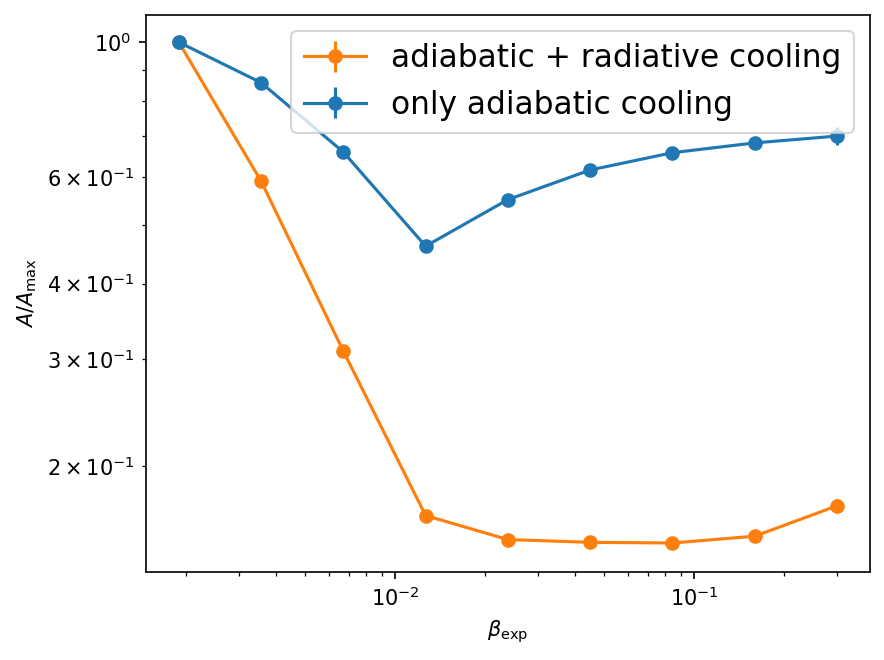

In [24]:
beta_exp_plot(t_beta,t_beta_nsc)

In [25]:
def nu_plot(t_c,t_nc):

    fig=plt.figure(dpi=150,figsize=(6,4.5))
    ax=fig.add_subplot()
    m=t_c['nu_obs']>=10E9
    m=np.logical_and(m,t_nc['nu_obs']<45E9)
    x=t_c['nu_obs'][m]
    y=t_c['A'][m]
    y_err=t_c['A_err'][m]
    y_err=(y_err/y)
    y=y/y.max()
    y_err=y_err*y
    ax.errorbar(x,y,yerr=y_err,marker='o',label='adiabatic + radiative cooling',c='C1')
    
 

    m=t_nc['nu_obs']>=10E9
    m=np.logical_and(m,t_nc['nu_obs']<45E9)
    x=t_nc['nu_obs'][m]
    y=t_nc['A'][m]
    y_err=t_nc['A_err'][m]
    y_err=(y_err/y)
    y=y/y.max()
    y_err=y_err*y
    ax.errorbar(x,y,yerr=y_err,marker='o',label='only adiabatic cooling',c='C0')

    plt.xscale('log')
    plt.yscale('log')
    #ax.set_ylim(5E-27,5E-26)
    ax.set_xlabel(r'$\nu_{\rm obs}$ (Hz)')
    ax.set_ylabel(r'$A/A_{\rm max}$')
    ax.legend(fontsize=15)
    plt.tight_layout()
    plt.tight_layout()
    fig.savefig('temp_ev_analysis_data_model_comparison_A_cooling/A_vs_nu_obs.pdf')


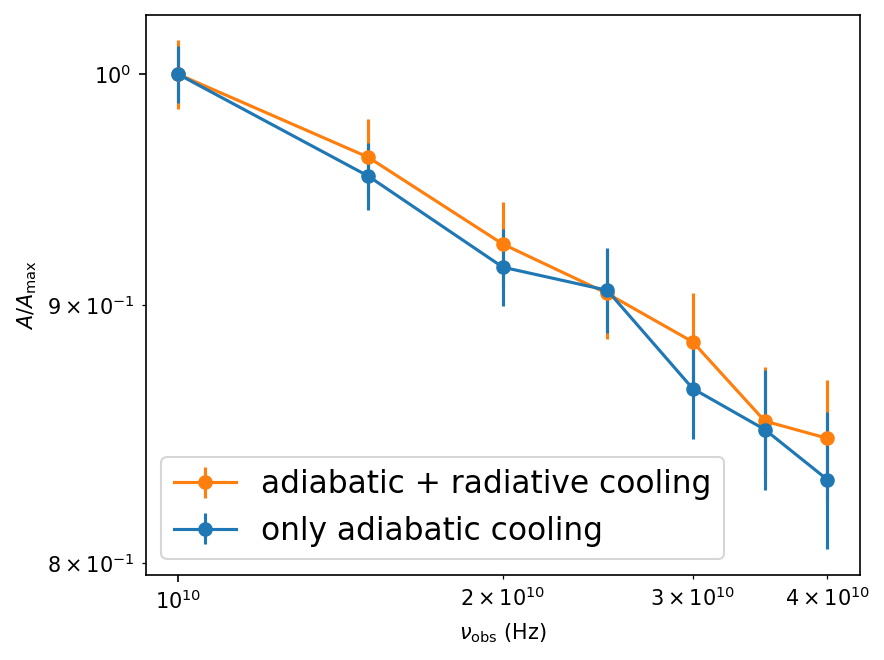

In [26]:
nu_plot(t_nu,t_nu_nsc)